0. **Mounting Google Drive**

**Google Colab Environment:**
Google Colab is a cloud-based platform that allows users to write, execute, and share Python code in a collaborative environment. It provides free access to GPUs and TPUs, making it particularly suitable for machine learning tasks.

**Mounting Google Drive:**
In this code snippet, the drive.mount command is used to connect Google Colab to the user's Google Drive. By running this cell, a link is generated, and when clicked, it prompts the user to sign in to their Google account. After signing in, an authorization code is provided, which needs to be entered in the notebook. Once authenticated, the user's Google Drive is mounted at the specified path, in this case, at '/content/drive'.

**Accessing Google Drive Files:
After mounting, you can access your Google Drive files and directories directly from the Colab notebook. This is useful for tasks such as loading datasets, saving model checkpoints, or working with files stored in Google Drive.

By mounting Google Drive, users can seamlessly integrate their cloud storage with their Colab environment, enabling easy data access and collaboration.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. **Importing Necessary Packages**

In [15]:
# Importing the scipy.io module for reading and writing MATLAB files
import scipy.io

# Importing the numpy library for numerical operations
import numpy as np

# Importing train_test_split and KFold from scikit-learn for data splitting
from sklearn.model_selection import train_test_split, KFold

# Importing confusion_matrix from scikit-learn for evaluating model performance
from sklearn.metrics import confusion_matrix

# Importing TensorFlow for deep learning capabilities
import tensorflow as tf

# Importing specific modules and classes from TensorFlow and Keras for building neural networks
from tensorflow.keras import layers, models

# Importing the pyplot module from matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization
import seaborn as sns

# Importing the pandas library for data manipulation and analysis
import pandas as pd


2. **Overview of Downloaded Files**

In [17]:
# Load data from a MATLAB file using scipy.io
# The file '99.mat' is located in the specified Google Drive path
demo_data = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/99.mat')

# Print the keys present in the loaded MATLAB file
# These keys represent variable names or data structures stored in the file
print(demo_data.keys())

# Access and print the shape of a specific variable ('X099_DE_time') from the loaded data
# This provides an overview of the dimensions of the data contained in the variable
X99_normal = demo_data['X099_DE_time']

print("\nShape of 'X099_DE_time':", X99_normal.shape)


dict_keys(['__header__', '__version__', '__globals__', 'ans', 'X098_DE_time', 'X098_FE_time', 'X099_DE_time', 'X099_FE_time'])

Shape of 'X099_DE_time': (485063, 1)


In [18]:
def ImportFiles():
  # Load data for the normal state of the machine from the MATLAB file '99.mat'
  X99_normal = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/99.mat')['X099_DE_time']

  # Load data for Inner Race Fault at 007 RPM from the MATLAB file '111.mat'
  X111_InnerRace_007 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/111.mat')['X111_DE_time']

  # Load data for Ball Fault at 007 RPM from the MATLAB file '124.mat'
  X124_Ball_007 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/124.mat')['X124_DE_time']

  # Load data for Outer Race Fault at 007 RPM from the MATLAB file '137.mat'
  X137_Outer_007 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/137.mat')['X137_DE_time']

  # Load data for Inner Race Fault at 014 RPM from the MATLAB file '176.mat'
  X176_InnerRace_014 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/176.mat')['X176_DE_time']

  # Load data for Ball Fault at 014 RPM from the MATLAB file '191.mat'
  X191_Ball_014 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/191.mat')['X191_DE_time']

  # Load data for Outer Race Fault at 014 RPM from the MATLAB file '203.mat'
  X203_Outer_014 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/203.mat')['X203_DE_time']

  # Load data for Inner Race Fault at 021 RPM from the MATLAB file '215.mat'
  X215_InnerRace_021 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/215.mat')['X215_DE_time']

  # Load data for Ball Fault at 021 RPM from the MATLAB file '228.mat'
  X228_Ball_021 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/228.mat')['X228_DE_time']

  # Load data for Outer Race Fault at 021 RPM from the MATLAB file '240.mat'
  X240_Outer_021 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/240.mat')['X240_DE_time']

  # Return a list containing the loaded data for different machine states
  return [X99_normal, X111_InnerRace_007, X124_Ball_007, X137_Outer_007, X176_InnerRace_014, X191_Ball_014, X203_Outer_014, X215_InnerRace_021, X228_Ball_021, X240_Outer_021]


 """
    Function to sample blocks of data from a given time series.

    Parameters:
    - Data: Time series data to be sampled.
    - interval_length: Length of each interval to be sampled.
    - samples_per_block: Number of samples to be collected in each block.

    Returns:
    - SplitData: 2D array containing sampled blocks of data.
    """

In [19]:
def Sampling(Data, interval_length, samples_per_block):

    # Calculate the number of blocks that can be sampled based on the interval length
    No_of_blocks = (round(len(Data) / interval_length) - round(samples_per_block / interval_length) - 1)
    SplitData = np.zeros([No_of_blocks, samples_per_block])

    # Sample blocks from the time series data
    for i in range(No_of_blocks):
        SplitData[i, :] = (Data[i * interval_length:(i * interval_length) + samples_per_block]).T

    return SplitData

  """
    Function to prepare data for training a model.

    Parameters:
    - Data: List of time series data for different machine states.
    - interval_length: Length of each interval to be sampled.
    - samples_per_block: Number of samples to be collected in each block.

    Returns:
    - X: 2D array containing the sampled data.
    - LabelPositional: 2D array representing one-hot encoding of the classes.
    - Label: 2D array representing the classes directly.
    """

In [20]:
def DataPreparation(Data, interval_length, samples_per_block):

    for count, i in enumerate(Data):
        SplitData = Sampling(i, interval_length, samples_per_block)

        # Initialize label arrays
        y = np.zeros([len(SplitData), 10])
        y[:, count] = 1
        y1 = np.zeros([len(SplitData), 1])
        y1[:, 0] = count

        # Stack up and label the data
        if count == 0:
            X = SplitData
            LabelPositional = y
            Label = y1
        else:
            X = np.append(X, SplitData, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)

    return X, LabelPositional, Label


# Importing the Required Columns from the Uploaded .mat Files
Data = ImportFiles()

# Set the parameters for data preparation
interval_length = 200
samples_per_block = 1681

# Prepare the data for training a model
X, Y_CNN, Y = DataPreparation(Data, interval_length, samples_per_block)

Optional:  Downloading the Preprocessed Data

In [21]:
XX = {'X':X}
scipy.io.savemat('Data.mat', XX)

In [22]:
# k-fold cross validation
kSplits = 5
kfold = KFold(n_splits=kSplits, random_state=32, shuffle=True)

In [23]:
# Reshape the data - 1 dimensional feed
print('Before Preprocessing: ')
print('\t Shape of Input X =', X.shape)
Input_1D = X.reshape([-1,1681,1])
print('\t Shape of Input_1D =', Input_1D.shape)

# Test-Train Split
X_1D_train, X_1D_test, y_1D_train, y_1D_test = train_test_split(Input_1D, Y_CNN, train_size=0.75,test_size=0.25, random_state=101)

print('\n\nAfter Preprocessing: ')
print('\tShape of X_1D_train =', X_1D_train.shape)
print('\tShape of y_1D_train =', y_1D_train.shape)

print('\n\tShape of X_1D_test =', X_1D_test.shape)
print('\tShape of y_1D_test =', y_1D_test.shape)

Before Preprocessing: 
	 Shape of Input X = (24276, 1681)
	 Shape of Input_1D = (24276, 1681, 1)


After Preprocessing: 
	Shape of X_1D_train = (18207, 1681, 1)
	Shape of y_1D_train = (18207, 10)

	Shape of X_1D_test = (6069, 1681, 1)
	Shape of y_1D_test = (6069, 10)


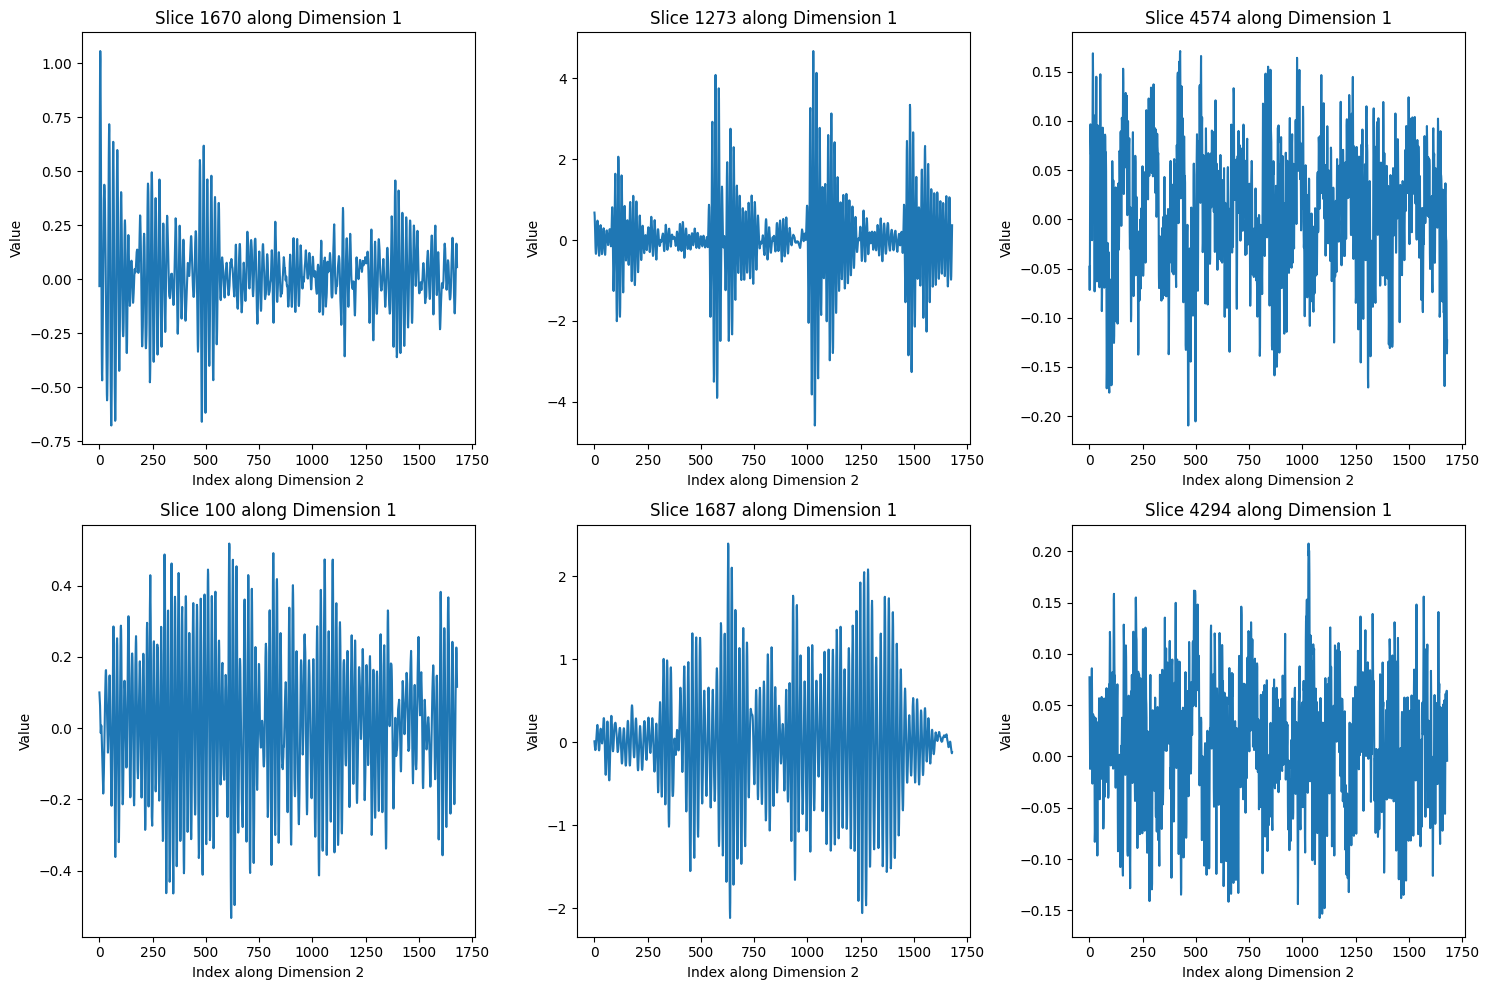

In [24]:
# Assuming your data is a numpy array
random_indices = np.random.choice(range( X_1D_test.shape[0]), size=1680, replace=False)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in zip(random_indices, axes.flatten()):
    ax.plot( X_1D_test[i, :, 0])
    ax.set_title(f'Slice {i} along Dimension 1')
    ax.set_xlabel('Index along Dimension 2')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


In [25]:
# Define the CNN Classification model
class CNN_1D():
  def __init__(self):
    self.model = self.CreateModel()

  def CreateModel(self):
    model = models.Sequential([
        layers.Conv1D(filters=16, kernel_size=3, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2),
        layers.Conv1D(filters=32, kernel_size=3, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2),
        layers.Conv1D(filters=64, kernel_size=3, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2),
        layers.Conv1D(filters=128, kernel_size=3, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2),
        layers.Flatten(),
        layers.InputLayer(),
        layers.Dense(100,activation='relu'),
        layers.Dense(50,activation='relu'),
        layers.Dense(10),
        layers.Softmax()
        ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    return model


accuracy_1D = []

# Train the model
for train, test in kfold.split(X_1D_train,y_1D_train):
  Classification_1D = CNN_1D()
  history = Classification_1D.model.fit(X_1D_train[train], y_1D_train[train], verbose=1, epochs=12)

  # Evaluate the accuracy of the model on the training set
  kf_loss, kf_accuracy = Classification_1D.model.evaluate(X_1D_train[test], y_1D_train[test])
  accuracy_1D.append(kf_accuracy)

CNN_1D_train_accuracy = np.average(accuracy_1D)*100
print('CNN 1D train accuracy =', CNN_1D_train_accuracy)


# Evaluate the accuracy of the model on the test set
CNN_1D_test_loss, CNN_1D_test_accuracy = Classification_1D.model.evaluate(X_1D_test, y_1D_test)
CNN_1D_test_accuracy*=100
print('CNN 1D test accuracy =', CNN_1D_test_accuracy)



Epoch 1/12
456/456 [==============================] - 14s 25ms/step - loss: 0.7647 - accuracy: 0.6987
Epoch 2/12
456/456 [==============================] - 12s 26ms/step - loss: 0.3050 - accuracy: 0.8599
Epoch 3/12
456/456 [==============================] - 9s 20ms/step - loss: 0.2051 - accuracy: 0.9066
Epoch 4/12
456/456 [==============================] - 12s 25ms/step - loss: 0.1168 - accuracy: 0.9528
Epoch 5/12
456/456 [==============================] - 11s 24ms/step - loss: 0.0754 - accuracy: 0.9732
Epoch 6/12
456/456 [==============================] - 10s 22ms/step - loss: 0.0610 - accuracy: 0.9779
Epoch 7/12
456/456 [==============================] - 12s 26ms/step - loss: 0.0426 - accuracy: 0.9852
Epoch 8/12
456/456 [==============================] - 10s 22ms/step - loss: 0.0510 - accuracy: 0.9798
Epoch 9/12
456/456 [==============================] - 11s 23ms/step - loss: 0.0390 - accuracy: 0.9850
Epoch 10/12
456/456 [==============================] - 12s 25ms/step - loss: 0.0323

**Testing Data Accuracy**

In [27]:
def ConfusionMatrix(Model, X, y):
  y_pred = np.argmax(Model.model.predict(X), axis=1)
  ConfusionMat = confusion_matrix(np.argmax(y, axis=1), y_pred)
  return ConfusionMat

569/569 [==============================] - 4s 7ms/step


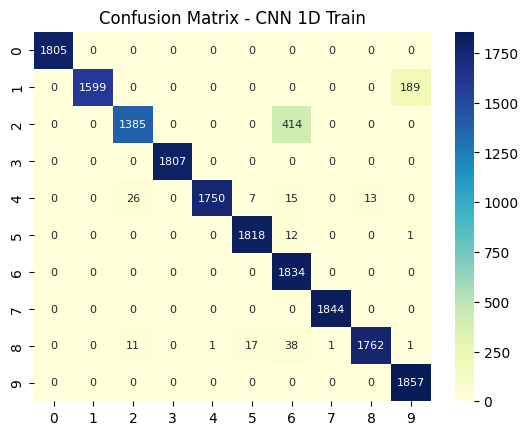

190/190 [==============================] - 2s 11ms/step


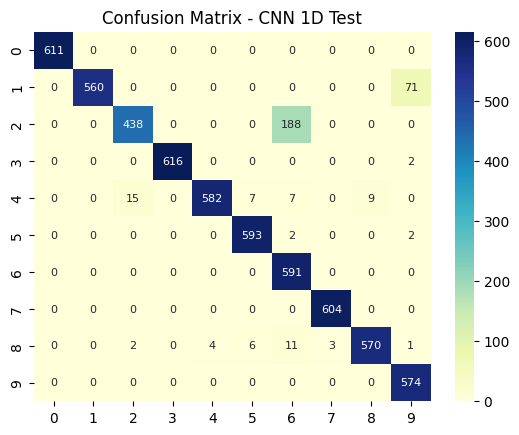

In [28]:
plt.figure(1)
plt.title('Confusion Matrix - CNN 1D Train')
sns.heatmap(ConfusionMatrix(Classification_1D, X_1D_train, y_1D_train) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(2)
plt.title('Confusion Matrix - CNN 1D Test')
sns.heatmap(ConfusionMatrix(Classification_1D, X_1D_test, y_1D_test) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

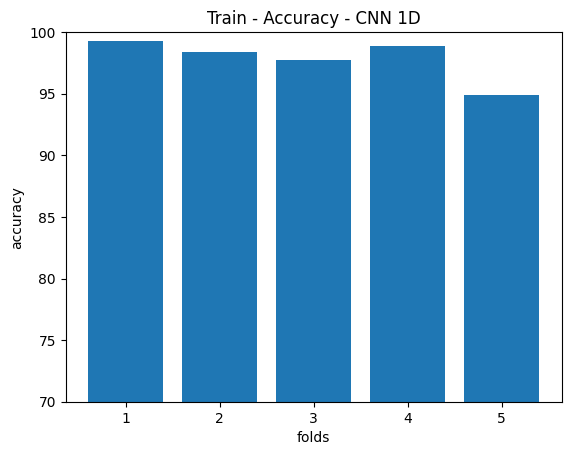

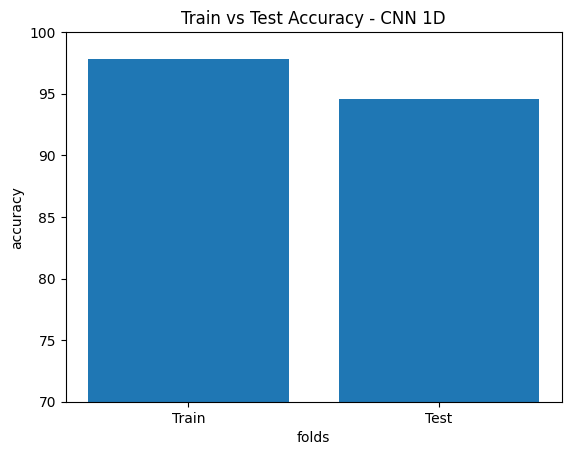

In [29]:
plt.figure(1)
plt.title('Train - Accuracy - CNN 1D')
plt.bar(np.arange(1,kSplits+1),[i*100 for i in accuracy_1D])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.ylim([70,100])
plt.show()

plt.figure(2)
plt.title('Train vs Test Accuracy - CNN 1D')
plt.bar([1,2],[CNN_1D_train_accuracy,CNN_1D_test_accuracy])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.xticks([1,2],['Train', 'Test'])
plt.ylim([70,100])
plt.show()

**Simulated Test Data**

**Error Data**

In [76]:
test = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/yourmatfilef.mat')['c']
print(test.shape)

(8971, 1)


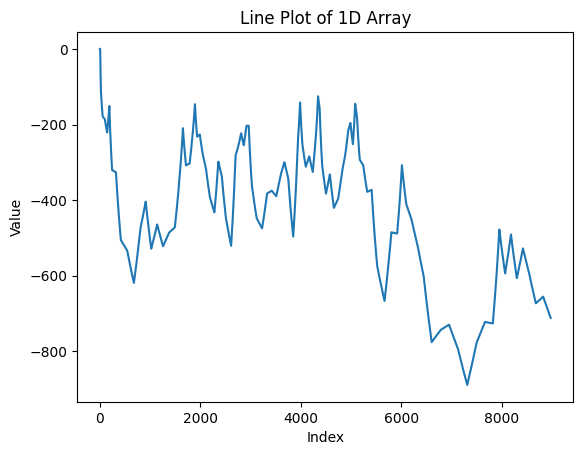

In [77]:
# Assuming your 1D array is named data
plt.plot(test)
plt.title('Line Plot of 1D Array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [78]:
def Sampling(Data, interval_length, samples_per_block):
    # Calculate the number of blocks that can be sampled based on the interval length
    no_of_blocks = (round(len(Data) / interval_length) - round(samples_per_block / interval_length) - 1)
    split_data = np.zeros([no_of_blocks, samples_per_block, 1])
    for i in range(no_of_blocks):
        split_data[i, :, 0] = Data[i * interval_length:(i * interval_length) + samples_per_block].flatten()
    return split_data

def DataPreparation(Data, interval_length, samples_per_block):
    for count, i in enumerate(Data):
        split_data = Sampling(i, interval_length, samples_per_block)
        y = np.zeros([len(split_data), 10])
        y[:, count] = 1
        y1 = np.zeros([len(split_data), 1])
        y1[:, 0] = count
        # Stack up and label the data
        if count == 0:
            X = split_data
            LabelPositional = y
            Label = y1
        else:
            X = np.append(X, split_data, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)
    return X, LabelPositional, Label

# Example usage
  # Replace this with your actual data
interval_length = 100
samples_per_block = 1681

X, LabelPositional, Label = DataPreparation([test], interval_length, samples_per_block)
print('Shape of Input Data =', X.shape)


Shape of Input Data = (72, 1681, 1)


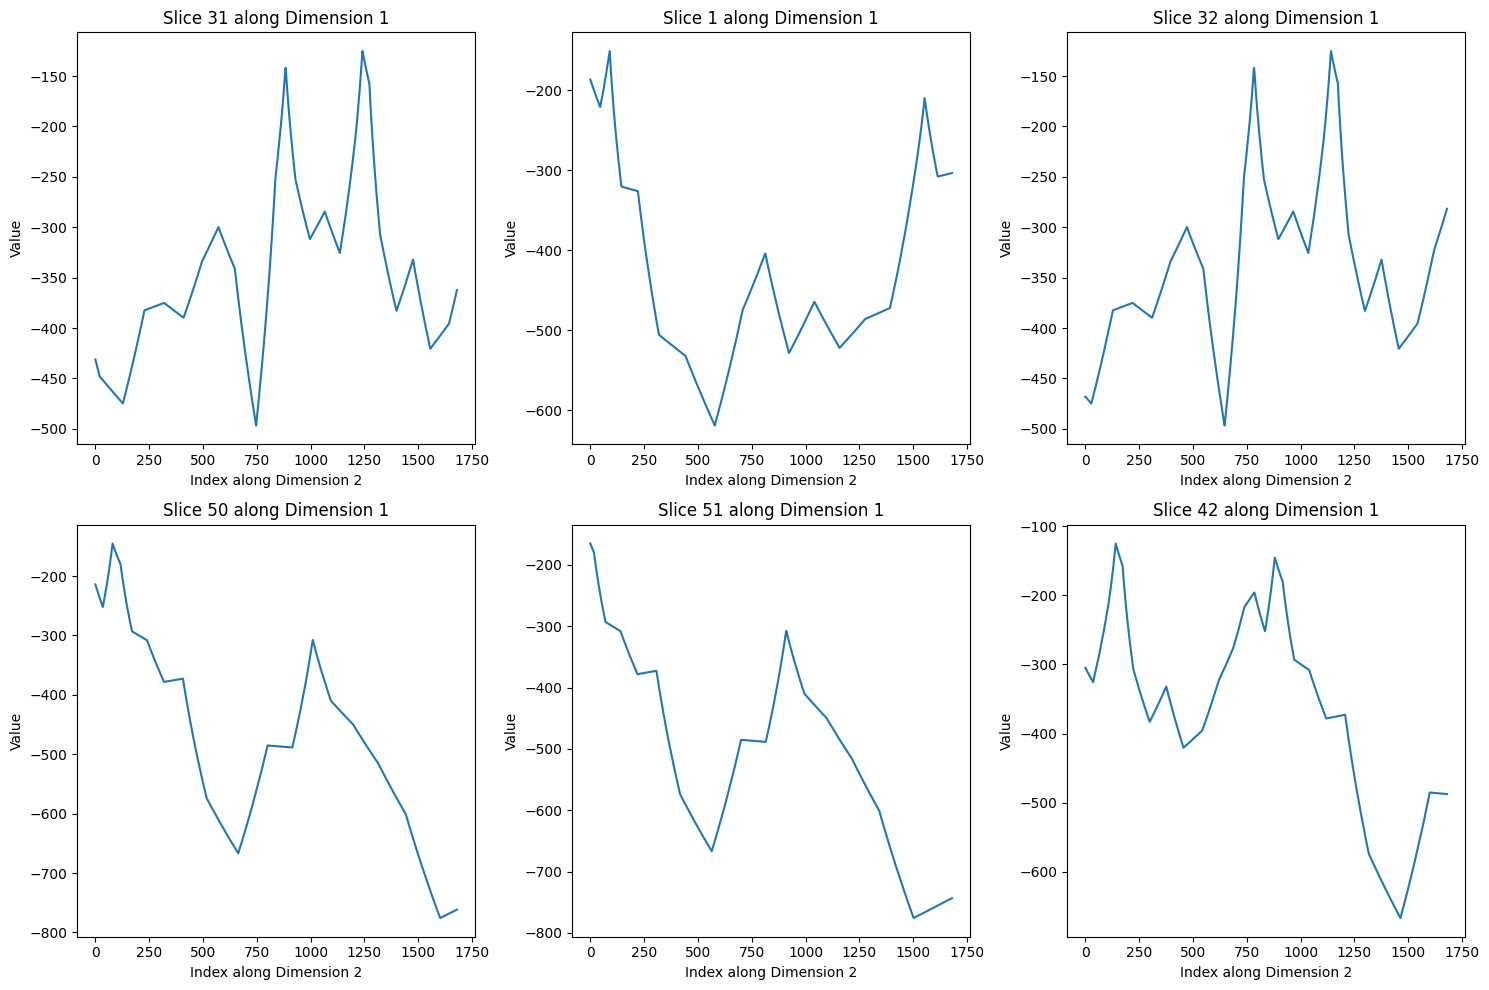

In [79]:
# Assuming your data is a numpy array
random_indices = np.random.choice(range(X.shape[0]), size=6, replace=False)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in zip(random_indices, axes.flatten()):
    ax.plot(X[i, :, 0])
    ax.set_title(f'Slice {i} along Dimension 1')
    ax.set_xlabel('Index along Dimension 2')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


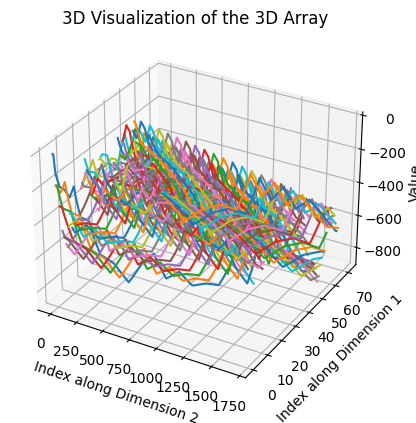

In [80]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming your data is a numpy array
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = range(X.shape[1]), range(X.shape[0])

for i in range(X.shape[0]):
    ax.plot(x, [i] * X.shape[1], X[i, :, 0])

ax.set_xlabel('Index along Dimension 2')
ax.set_ylabel('Index along Dimension 1')
ax.set_zlabel('Value')
plt.title('3D Visualization of the 3D Array')
plt.show()

In [81]:
# Reshape the data - 1 dimensional feed
print('Shape of Test X =', test.shape)
Test_1D = X.reshape([-1,1681,1])
print('Shape of Input_1D =', X.shape)
print('Shape of X_1D_test =', X_1D_test.shape)

Shape of Test X = (8971, 1)
Shape of Input_1D = (72, 1681, 1)
Shape of X_1D_test = (6069, 1681, 1)


In [82]:
y_test = Classification_1D.model.predict(X_1D_test)

190/190 [==============================] - 2s 9ms/step


In [83]:
print(y_test)

[[5.0992092e-25 6.0768651e-14 1.9096517e-14 ... 4.5691871e-05
  9.9370015e-01 7.7692439e-06]
 [7.1729588e-26 1.1569956e-11 7.8690767e-15 ... 1.2728958e-05
  9.9975038e-01 4.1147239e-08]
 [4.6762549e-09 8.5244956e-06 9.6862954e-01 ... 3.8351833e-09
  2.3330103e-05 1.2904636e-06]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.8861093e-36
  3.1229186e-21 1.4331549e-08]
 [6.4711358e-10 1.5929965e-09 2.7143939e-08 ... 1.0446821e-10
  1.6976046e-11 2.3566363e-04]
 [0.0000000e+00 0.0000000e+00 4.8762580e-38 ... 2.0405825e-37
  2.4128978e-18 7.3871046e-04]]


In [84]:
# Find the largest element in each row
largest_elements = np.max(y_test, axis=1)

# Print the result
print(largest_elements)

[0.99370015 0.9997504  0.96862954 ... 1.         0.98808146 0.9992613 ]


In [87]:
# List of variable names
variable_names = ['X99_normal', 'X111_InnerRace_007', 'X124_Ball_007', 'X137_Outer_007',
                  'X176_InnerRace_014', 'X191_Ball_014', 'X203_Outer_014',
                  'X215_InnerRace_021', 'X228_Ball_021', 'X240_Outer_021']


# Find the largest element and its index in each row for the first 10 rows
largest_elements = np.max(y_test[:10], axis=1)
largest_indices = np.argmax(y_test[:10], axis=1)

# Print the result for the first 10 rows
for i, (largest_element, largest_index) in enumerate(zip(largest_elements, largest_indices)):
    print(f"For row {i + 1}, the largest element is {largest_element} at from {variable_names[largest_index]}")


For row 1, the largest element is 0.9937001466751099 at from X228_Ball_021
For row 2, the largest element is 0.9997503757476807 at from X228_Ball_021
For row 3, the largest element is 0.9686295390129089 at from X124_Ball_007
For row 4, the largest element is 0.9999999403953552 at from X137_Outer_007
For row 5, the largest element is 0.9825963973999023 at from X191_Ball_014
For row 6, the largest element is 0.9999999403953552 at from X215_InnerRace_021
For row 7, the largest element is 0.9119036793708801 at from X228_Ball_021
For row 8, the largest element is 0.9999106526374817 at from X203_Outer_014
For row 9, the largest element is 0.9999999403953552 at from X240_Outer_021
For row 10, the largest element is 0.8910347819328308 at from X124_Ball_007


**Smooth Data**

In [88]:
smooth = scipy.io.loadmat('//content/drive/MyDrive/DATA/demo.mat')['data']
print(smooth.shape)

(480894, 1)


In [89]:
import numpy as np

def Sampling(Data, interval_length, samples_per_block):
    # Calculate the number of blocks that can be sampled based on the interval length
    no_of_blocks = (round(len(Data) / interval_length) - round(samples_per_block / interval_length) - 1)
    split_data = np.zeros([no_of_blocks, samples_per_block, 1])
    for i in range(no_of_blocks):
        split_data[i, :, 0] = Data[i * interval_length:(i * interval_length) + samples_per_block].flatten()
    return split_data

def DataPreparation(Data, interval_length, samples_per_block):
    for count, i in enumerate(Data):
        split_data = Sampling(i, interval_length, samples_per_block)
        y = np.zeros([len(split_data), 10])
        y[:, count] = 1
        y1 = np.zeros([len(split_data), 1])
        y1[:, 0] = count
        # Stack up and label the data
        if count == 0:
            X = split_data
            LabelPositional = y
            Label = y1
        else:
            X = np.append(X, split_data, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)
    return X, LabelPositional, Label

# Example usage
  # Replace this with your actual data
interval_length = 100
samples_per_block = 1681

X, LabelPositional, Label = DataPreparation([smooth], interval_length, samples_per_block)
print('Shape of Input Data =', X.shape)


Shape of Input Data = (4791, 1681, 1)


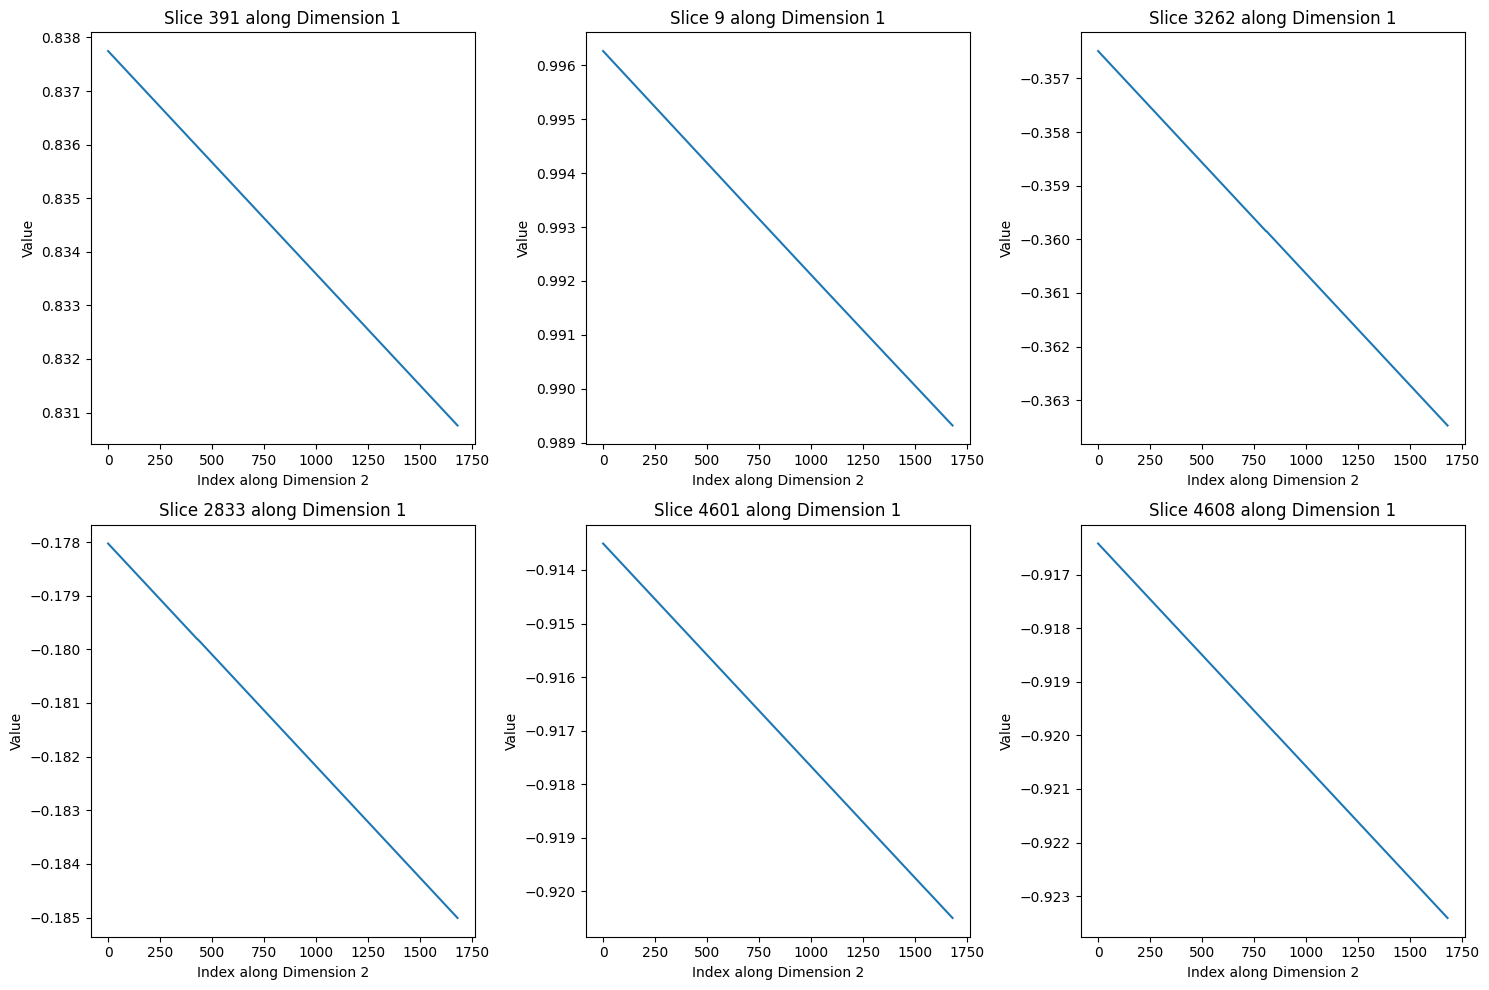

In [90]:
# Assuming your data is a numpy array
random_indices = np.random.choice(range(X.shape[0]), size=6, replace=False)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in zip(random_indices, axes.flatten()):
    ax.plot(X[i, :, 0])
    ax.set_title(f'Slice {i} along Dimension 1')
    ax.set_xlabel('Index along Dimension 2')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

**Confirming the Arrays Size**

In [91]:
# Reshape the data - 1 dimensional feed
print('Shape of Test X =', test.shape)
Test_1D = X.reshape([-1,1681,1])
print('Shape of Input_1D =', X.shape)
print('Shape of X_1D_test =', X_1D_test.shape)
print('Shape of y_1D_test =', y_1D_test.shape)


Shape of Test X = (8971, 1)
Shape of Input_1D = (4791, 1681, 1)
Shape of X_1D_test = (6069, 1681, 1)
Shape of y_1D_test = (6069, 10)


In [92]:
y_test = Classification_1D.model.predict(X)


150/150 [==============================] - 1s 7ms/step


In [97]:
print(y_test)


(4791, 10)


In [100]:
# Find the largest element in each row
largest_elements = np.max(y_test, axis=1)

# Print the result
print(largest_elements)

[0.99999994 0.99999994 0.99999994 ... 1.         1.         1.        ]


In [107]:
# List of variable names
variable_names = ['X99_normal', 'X111_InnerRace_007', 'X124_Ball_007', 'X137_Outer_007',
                  'X176_InnerRace_014', 'X191_Ball_014', 'X203_Outer_014',
                  'X215_InnerRace_021', 'X228_Ball_021', 'X240_Outer_021','No Significant Fault']


# Find the largest element and its index in each row for the first 10 rows
largest_elements = np.max(y_test[:20], axis=1)
largest_indices = np.argmax(y_test[:20], axis=1)

# Print the result for the first 10 rows
for i, (largest_element, largest_index) in enumerate(zip(largest_elements, largest_indices)):
  prev = largest_element;
  if prev != largest_element:
    print(f"For row {i + 1}, the largest element is {largest_element} at from {variable_names[largest_index]}")
  else:
    print(f"For row {i + 1}, the largest element is {largest_element} at from {variable_names[10]}")
  prev = largest_element;


For row 1, the largest element is 0.9999999403953552 at from No Significant Fault
For row 2, the largest element is 0.9999999403953552 at from No Significant Fault
For row 3, the largest element is 0.9999999403953552 at from No Significant Fault
For row 4, the largest element is 0.9999999403953552 at from No Significant Fault
For row 5, the largest element is 0.9999999403953552 at from No Significant Fault
For row 6, the largest element is 0.9999999403953552 at from No Significant Fault
For row 7, the largest element is 0.9999999403953552 at from No Significant Fault
For row 8, the largest element is 0.9999999403953552 at from No Significant Fault
For row 9, the largest element is 0.9999999403953552 at from No Significant Fault
For row 10, the largest element is 0.9999999403953552 at from No Significant Fault
For row 11, the largest element is 0.9999999403953552 at from No Significant Fault
For row 12, the largest element is 0.9999999403953552 at from No Significant Fault
For row 13, t